In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from sklearn.metrics import mean_squared_error

In [40]:
dataset = pd.read_csv('../Data/robot-training.csv')

In [41]:
dataset.head()

,Asilabilir_Engel_Seviyesi,Haritalandirma,Hazne_Kapasitesi,Uygulama_Uzerinden_Kontrol,Yer_Silme_Ozelligi,Sarjli_Kullanim_Suresi,Fiyat,marka
0,2.0,3,3,0,0,3,9299.0,123
1,2.0,2,3,0,0,1,18499.0,86
2,2.0,2,3,0,0,1,17099.0,86
3,2.0,2,3,0,0,1,14499.0,89
4,1.0,3,3,0,0,1,14599.0,86


In [42]:
dataset['Fiyat'].value_counts()

Fiyat
21999.0     34
34999.0     22
1999.0      17
9999.0      16
12999.0     13
            ..
355490.0     1
98441.0      1
18990.0      1
12669.0      1
200.0        1
Name: count, Length: 439, dtype: int64

In [43]:
X = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, -2].values
y = y.reshape(-1, 1) 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (587, 7)
X_test:  (147, 7)
y_train:  (587, 1)
y_test:  (147, 1)


In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

 3 nn score: 0.9995397557018639 


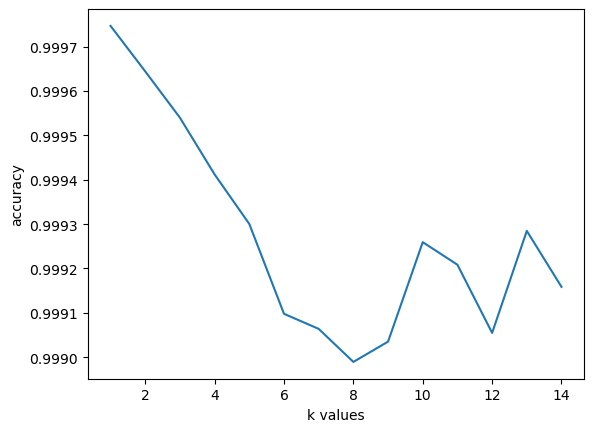

In [47]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsRegressor(n_neighbors=each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [48]:
# en iyi sonucu 2 de aldık 
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(6,knn.score(X_test,y_test)))

 6 nn score: 0.9996440584847459 


In [49]:

DT_RMS = math.sqrt(mean_squared_error(y_test,prediction))
print("Decision Tree Regresyon RMS Değeri:", DT_RMS)

Decision Tree Regresyon RMS Değeri: 1246.9807618436473


In [50]:
import joblib
joblib.dump(knn, "../Modelpkl/KNN_model.pkl")

['../Modelpkl/KNN_model.pkl']